# Table of Contents
1. [Price Range Explanatory Data Analysis](#Price-Range-Explanatory-Data-Analysis)
   1. [Setup & Imports](#Setup-&-Imports)
   2. [Data Preparation](#Data-Preparation)
   3. [Statistics](#Statistics)
   4. [Duplicate Values](#Duplicate-Values)
   5. [Missing Values](#Missing-Values)
   6. [Outliers](#Outliers)
   7. [Correlation](#Correlation)

# Price Range Explanatory Data Analysis

## Setup & Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_train = pd.read_csv('/home/data_train.csv')

data_validation = pd.read_csv('/home/data_validation.csv')

## Data Preparation

In [4]:
df = data_train

# Reorder columns
df = df[[ 'battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range' ]]

In [6]:
# Change boolean/enum column value
df['blue']         = df['blue'].replace({ 0: 'No', 1: 'Yes' })
df['dual_sim']     = df['dual_sim'].replace({ 0: 'No', 1: 'Yes' })
df['four_g']       = df['four_g'].replace({ 0: 'No', 1: 'Yes' })
df['three_g']      = df['three_g'].replace({ 0: 'No', 1: 'Yes' })
df['touch_screen'] = df['touch_screen'].replace({ 0: 'No', 1: 'Yes' })
df['wifi']         = df['wifi'].replace({ 0: 'No', 1: 'Yes' })
df['price_range']  = df['price_range'].replace({ 0: 'Biaya Rendah', 1: 'Biaya Sedang', 2: 'Biaya Tinggi', 3: 'Biaya Sangat Tinggi' })

# Rename column for better readability
df = df.rename(columns={
  'battery_power' : 'Battery Power (mAh)',
  'clock_speed'   : 'Clock Speed (GHz)',
  'fc'            : 'Front Camera Resolution (MP)',
  'int_memory'    : 'Internal Memory (GB)',
  'm_dep'         : 'Thickness (cm)',
  'mobile_wt'     : 'Phone Weight (g)',
  'n_cores'       : 'Number of Cores',
  'pc'            : 'Main Camera Resolution (MP)',
  'px_height'     : 'Pixel Resolution Height',
  'px_width'      : 'Pixel Resolution Width',
  'ram'           : 'RAM (MB)',
  'sc_h'          : 'Screen Height (cm)',
  'sc_w'          : 'Screen Width (cm)',
  'talk_time'     : 'Maximum Call Time (h)',
  'blue'          : 'Bluetooth Support',
  'dual_sim'      : 'Dual Sim Support',
  'four_g'        : '4G Support',
  'three_g'       : '3G Support',
  'touch_screen'  : 'Touch Screen Support',
  'wifi'          : 'WiFi Support',
  'price_range'   : 'Price Range'
})

numerical_df = df[[ 'Battery Power (mAh)', 'Clock Speed (GHz)', 'Front Camera Resolution (MP)','Internal Memory (GB)','Thickness (cm)','Phone Weight (g)','Number of Cores','Main Camera Resolution (MP)','Pixel Resolution Height','Pixel Resolution Width','RAM (MB)','Screen Height (cm)','Screen Width (cm)','Maximum Call Time (h)' ]]

non_numerical_df = df[[ 'Bluetooth Support', 'Dual Sim Support', '4G Support', '3G Support', 'Touch Screen Support', 'WiFi Support', 'Price Range' ]]

## Statistics

### Numerical Values Statistics

In [100]:
# Pulling columns with numerical values
numerical_data_df = numerical_df.describe().T

# Rename column for better readability
numerical_data_df = numerical_data_df.rename(columns={
    'count' : 'Count',
    'mean'  : 'Mean',
    'std'   : 'Standard Deviation',
    'min'   : 'Minimum Value',
    '25%'   : 'First Quartile',
    '50%'   : 'Second Quartile',
    '75%'   : 'Third Quartile',
    'max'   : 'Maximum Value'
})

numerical_data_df

,Count,Mean,Standard Deviation,Minimum Value,First Quartile,Second Quartile,Third Quartile,Maximum Value
Battery Power (mAh),1400.0,1237.145714,430.051785,501.0,864.75,1219.0,1602.00,1998.0
Clock Speed (GHz),1400.0,1.521714,0.814723,0.5,0.70,1.5,2.20,3.0
Front Camera Resolution (MP),1400.0,4.275000,4.324170,0.0,1.00,3.0,7.00,19.0
Internal Memory (GB),1400.0,31.962143,18.162970,2.0,16.00,32.0,48.00,64.0
Thickness (cm),1400.0,0.507857,0.288539,0.1,0.20,0.5,0.80,1.0
Phone Weight (g),1400.0,139.375714,35.400803,80.0,108.00,139.0,169.00,200.0
Number of Cores,1400.0,4.481429,2.279836,1.0,2.00,4.0,7.00,8.0
Main Camera Resolution (MP),1400.0,9.917143,6.080023,0.0,5.00,10.0,15.00,20.0
Pixel Resolution Height,1400.0,643.177857,444.628980,0.0,273.75,561.0,950.25,1960.0
Pixel Resolution Width,1400.0,1251.717143,428.982850,500.0,876.50,1247.0,1627.50,1998.0


#### Analysis

From the data above, we can conclude the following:
- Each cell in every column has a value
- Clock Speed is likely measured in GHz
- Phone Weight is likely measured in grams
- Maximum Call Time is likely measured in hours


### Non Numerical Values Statistics

In [101]:
non_numerical_data_df = non_numerical_df.describe().T

non_numerical_data_df = non_numerical_data_df.rename(columns={
    'count'   : 'Count',
    'unique'  : 'Distinct Values',
    'top'     : 'Largest Occurance',
    'freq'    : 'Amount of Occurance'
})

non_numerical_data_df

,Count,Distinct Values,Largest Occurance,Amount of Occurance
Bluetooth Support,1400,2,No,709
Dual Sim Support,1400,2,Yes,704
4G Support,1400,2,Yes,742
3G Support,1400,2,Yes,1065
Touch Screen Support,1400,2,No,715
WiFi Support,1400,2,No,707
Price Range,1400,4,Biaya Rendah,358


#### Analysis

From the data above, we can conclude the following:
- Support for Bluetooth, Dual Sim, Touch Screen, and WiFi is evenly distributed
- There are slightly more phones that support 4G than those that don't
- The majority of phones support 3G
- The amount of data for a given price range is evenly distributed

## Duplicate Values

In [102]:
df[df.duplicated()]

,Battery Power (mAh),Clock Speed (GHz),Front Camera Resolution (MP),Internal Memory (GB),Thickness (cm),Phone Weight (g),Number of Cores,Main Camera Resolution (MP),Pixel Resolution Height,Pixel Resolution Width,...,Screen Height (cm),Screen Width (cm),Maximum Call Time (h),Bluetooth Support,Dual Sim Support,4G Support,3G Support,Touch Screen Support,WiFi Support,Price Range


### Analysis

There are no duplicated rows found

## Missing Values

In [7]:
df.isnull().sum()

Battery Power (mAh)             0
Clock Speed (GHz)               0
Front Camera Resolution (MP)    0
Internal Memory (GB)            0
Thickness (cm)                  0
Phone Weight (g)                0
Number of Cores                 0
Main Camera Resolution (MP)     0
Pixel Resolution Height         0
Pixel Resolution Width          0
RAM (MB)                        0
Screen Height (cm)              0
Screen Width (cm)               0
Maximum Call Time (h)           0
Bluetooth Support               0
Dual Sim Support                0
4G Support                      0
3G Support                      0
Touch Screen Support            0
WiFi Support                    0
Price Range                     0
dtype: int64

### Analysis

There are no missing values found

## Outliers

<Axes: >

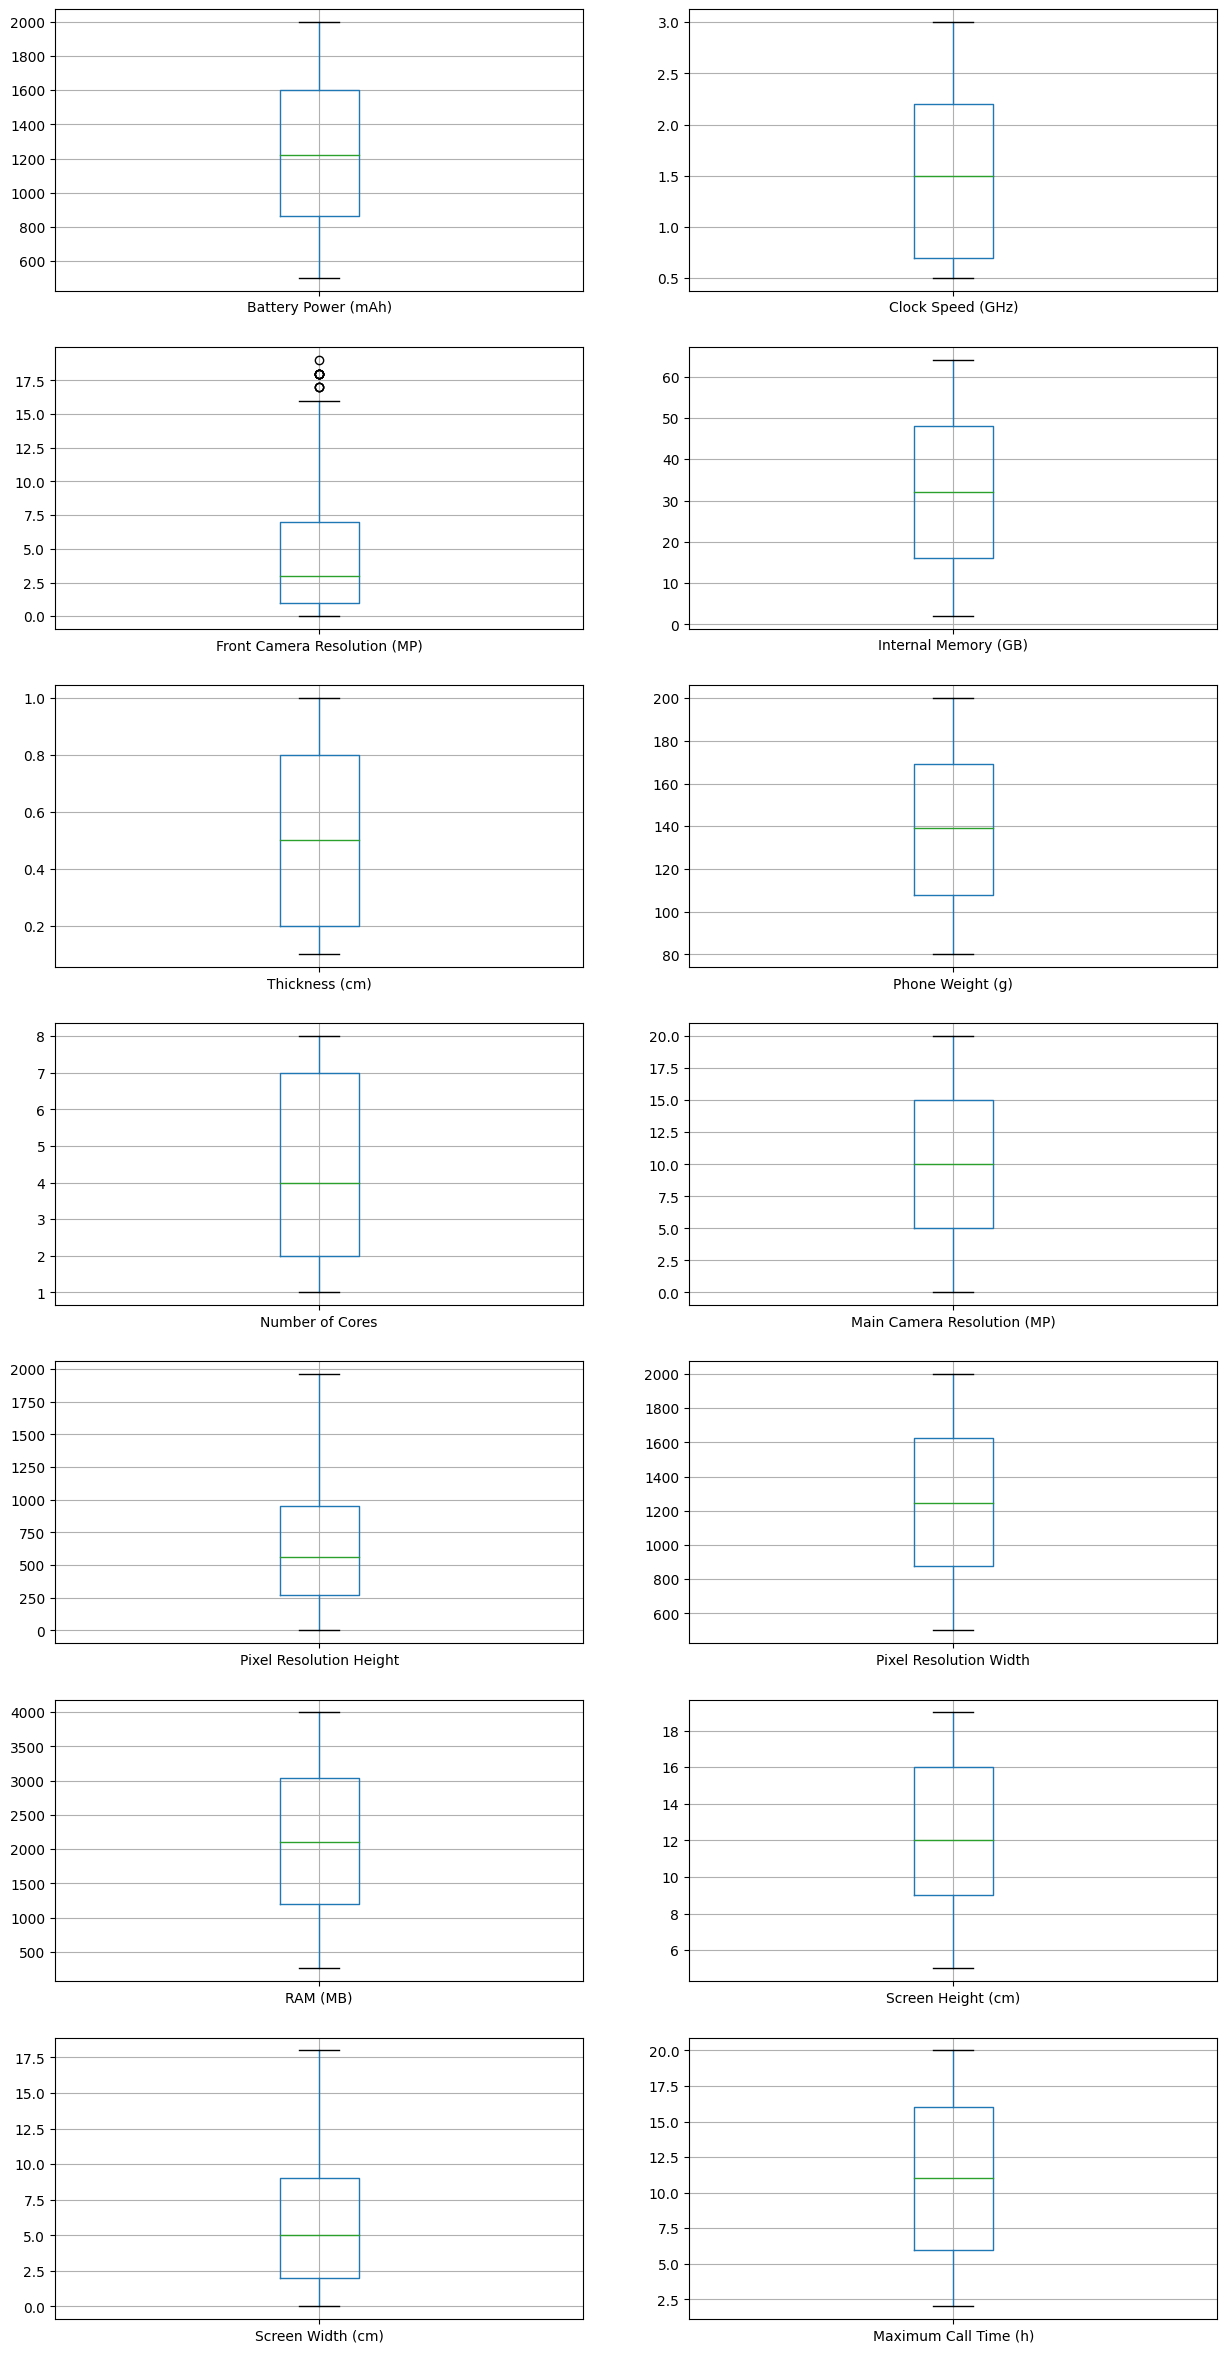

In [104]:
# Finding outliers in each column with box plot

fig, ax = plt.subplots(7, 2, figsize=(15, 30))
df.boxplot('Battery Power (mAh)', ax=ax[0, 0])
df.boxplot('Clock Speed (GHz)', ax=ax[0, 1])
df.boxplot('Front Camera Resolution (MP)', ax=ax[1, 0])
df.boxplot('Internal Memory (GB)', ax=ax[1, 1])
df.boxplot('Thickness (cm)', ax=ax[2, 0])
df.boxplot('Phone Weight (g)', ax=ax[2, 1])
df.boxplot('Number of Cores', ax=ax[3, 0])
df.boxplot('Main Camera Resolution (MP)', ax=ax[3, 1])
df.boxplot('Pixel Resolution Height', ax=ax[4, 0])
df.boxplot('Pixel Resolution Width', ax=ax[4, 1])
df.boxplot('RAM (MB)', ax=ax[5, 0])
df.boxplot('Screen Height (cm)', ax=ax[5, 1])
df.boxplot('Screen Width (cm)', ax=ax[6, 0])
df.boxplot('Maximum Call Time (h)', ax=ax[6, 1])

In [105]:
# Outliers in Front Camera Resolution column

front_camera_df = df['Front Camera Resolution (MP)']
q1, q3 = front_camera_df.quantile([0.25, 0.75])
maximum = q3 + 1.5 * (q3 - q1)

df[df['Front Camera Resolution (MP)'] > maximum ]

,Battery Power (mAh),Clock Speed (GHz),Front Camera Resolution (MP),Internal Memory (GB),Thickness (cm),Phone Weight (g),Number of Cores,Main Camera Resolution (MP),Pixel Resolution Height,Pixel Resolution Width,...,Screen Height (cm),Screen Width (cm),Maximum Call Time (h),Bluetooth Support,Dual Sim Support,4G Support,3G Support,Touch Screen Support,WiFi Support,Price Range
53,1290,1.4,19,35,0.3,110,4,20,405,742,...,16,2,8,Yes,Yes,Yes,Yes,No,No,Biaya Rendah
98,1731,2.3,18,60,0.5,171,4,20,142,1039,...,9,3,20,Yes,Yes,No,No,Yes,No,Biaya Sedang
413,946,2.6,17,5,0.1,166,3,20,1698,1771,...,15,7,4,Yes,Yes,No,No,Yes,No,Biaya Sangat Tinggi
603,1348,2.0,18,52,0.3,98,3,20,1869,1942,...,18,11,7,No,No,No,Yes,Yes,Yes,Biaya Sedang
778,1533,1.1,18,17,0.3,160,4,20,1054,1393,...,8,2,11,Yes,Yes,Yes,Yes,No,Yes,Biaya Tinggi
797,1772,1.6,17,45,0.5,159,2,18,837,1405,...,6,1,17,Yes,No,Yes,Yes,Yes,No,Biaya Sedang
1035,1708,2.4,18,49,0.1,109,1,19,233,517,...,6,4,16,Yes,Yes,Yes,Yes,Yes,Yes,Biaya Sangat Tinggi
1072,1137,1.0,18,7,1.0,196,3,19,942,1179,...,13,5,12,Yes,No,No,Yes,Yes,Yes,Biaya Sangat Tinggi
1150,695,0.5,18,12,0.6,196,2,19,1649,1829,...,16,13,7,No,No,Yes,Yes,Yes,Yes,Biaya Tinggi
1232,1957,1.2,18,36,0.8,151,2,19,1194,1727,...,16,2,18,No,Yes,Yes,Yes,No,Yes,Biaya Sedang


### Analysis

It can be seen that there are 11 outlier data using the boxplot method.

## Data Distribution

### Numerical Values Plot

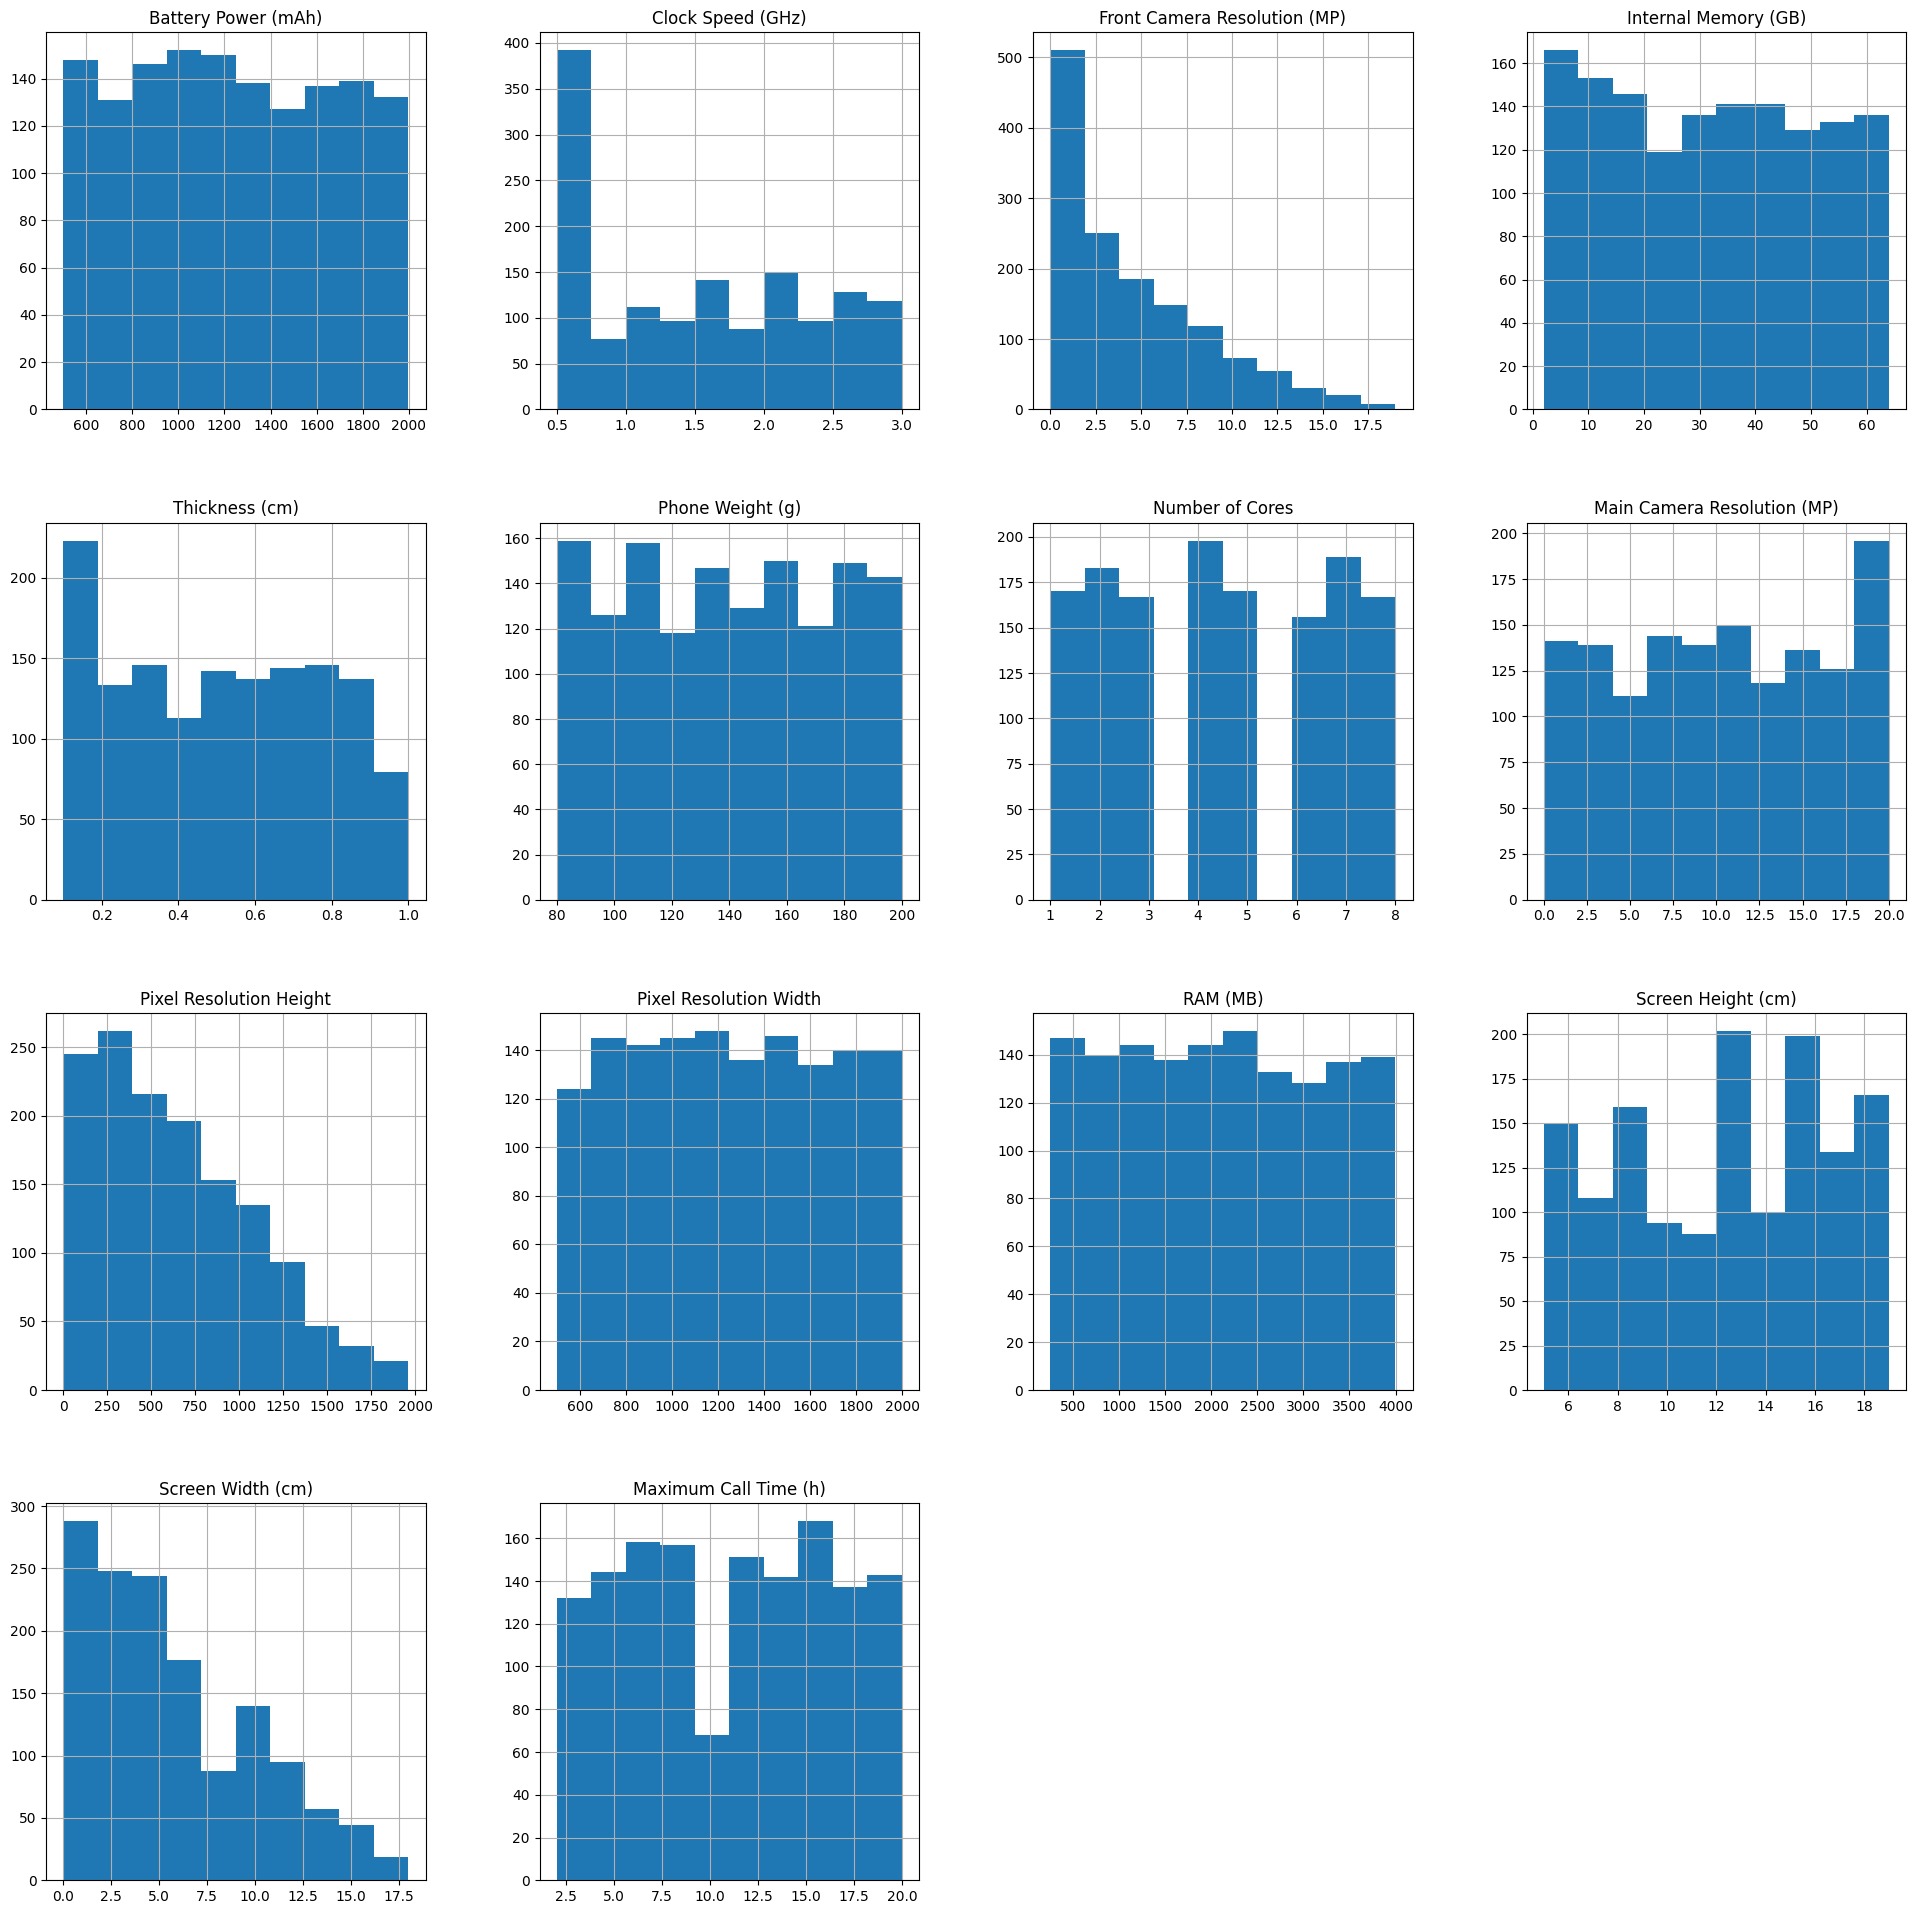

In [106]:
# Histogram for all numerical values

numerical_df.hist(sharex=False, sharey=False, figsize=(24, 24))
plt.show()

In [107]:
# Kurtosis

numerical_df.kurtosis()

Battery Power (mAh)            -1.168068
Clock Speed (GHz)              -1.329523
Front Camera Resolution (MP)    0.293404
Internal Memory (GB)           -1.227200
Thickness (cm)                 -1.266823
Phone Weight (g)               -1.210202
Number of Cores                -1.232209
Main Camera Resolution (MP)    -1.163876
Pixel Resolution Height        -0.316229
Pixel Resolution Width         -1.176025
RAM (MB)                       -1.186141
Screen Height (cm)             -1.183273
Screen Width (cm)              -0.334641
Maximum Call Time (h)          -1.192018
dtype: float64

### Analysis

Only Front Camera Resolution having a positive value of kurtosis, it means that there might be some extreme values (outliers) in the distribution. The rest of the column having a negative value of kurtosis, it means that the distribution are less likely to produce outliers.

### Non Numerical Values

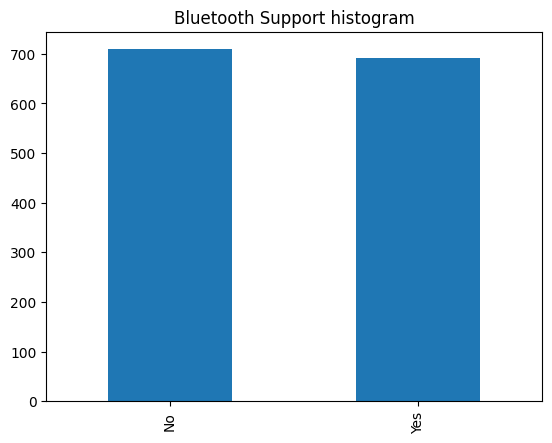

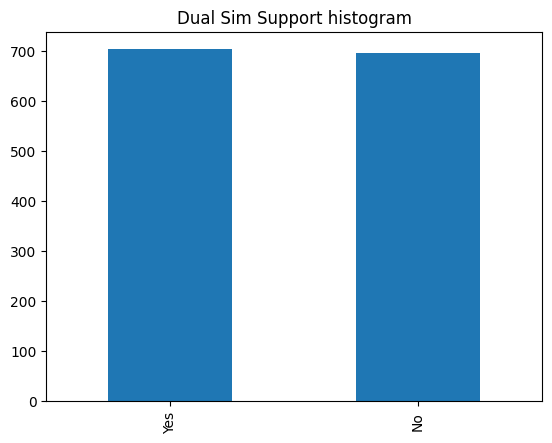

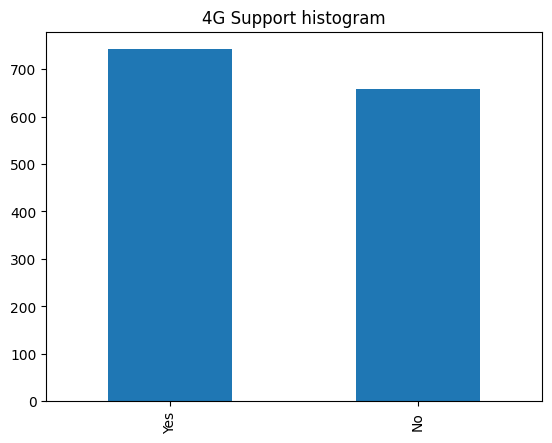

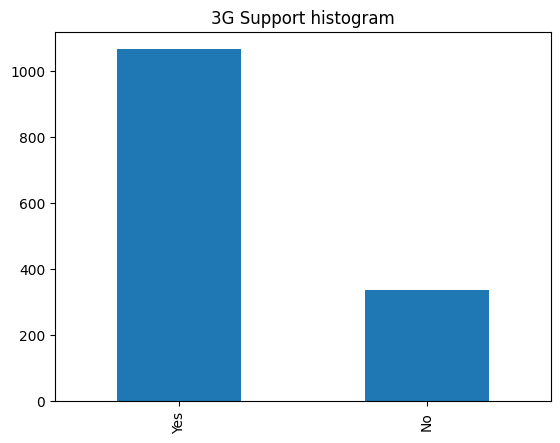

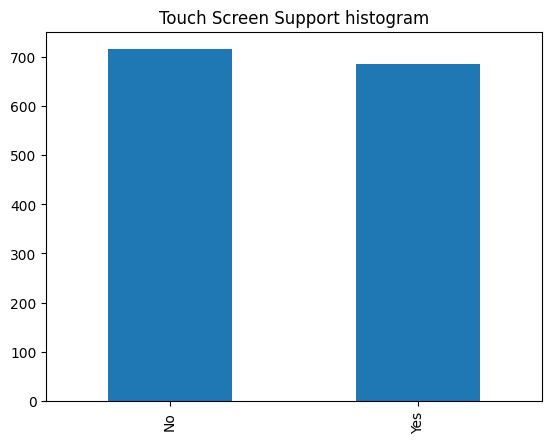

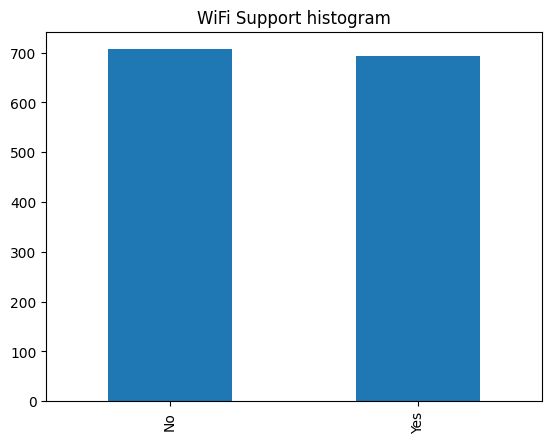

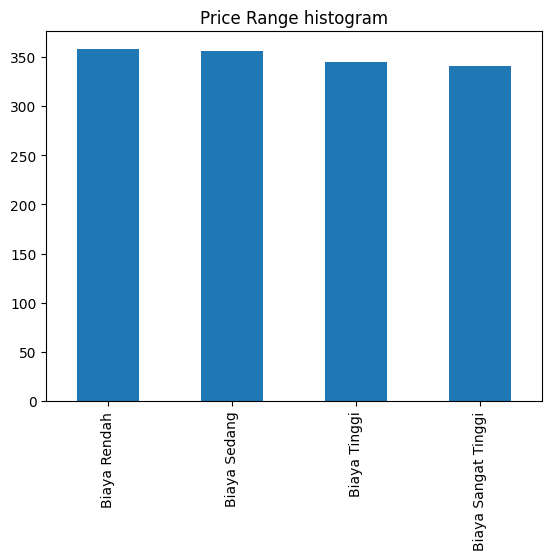

In [108]:
# Bar plot for all non numerical values

for column in non_numerical_df.columns:
  temp_df = non_numerical_df[column].value_counts()
  temp_df.plot(kind='bar', title=f'{column} histogram')
  plt.show()

## Correlation

In [114]:
df.corr()

<ipython-input-114-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Battery Power (mAh),Clock Speed (GHz),Front Camera Resolution (MP),Internal Memory (GB),Thickness (cm),Phone Weight (g),Number of Cores,Main Camera Resolution (MP),Pixel Resolution Height,Pixel Resolution Width,RAM (MB),Screen Height (cm),Screen Width (cm),Maximum Call Time (h)
Battery Power (mAh),1.000000,0.012937,0.005774,0.016187,0.017010,0.011705,-0.017015,0.003270,-0.003244,-0.019042,-0.013218,-0.022521,-0.022134,0.038071
Clock Speed (GHz),0.012937,1.000000,-0.004902,0.005417,-0.023744,0.008879,-0.011135,-0.003518,-0.016482,0.012462,0.022962,0.004114,0.020765,-0.000566
Front Camera Resolution (MP),0.005774,-0.004902,1.000000,-0.041477,-0.017144,0.027141,-0.006261,0.644348,-0.016191,-0.050449,0.001307,-0.010459,-0.008810,0.003483
Internal Memory (GB),0.016187,0.005417,-0.041477,1.000000,0.041084,-0.040759,-0.041109,-0.031596,0.026845,-0.003778,0.007183,0.024976,-0.005848,-0.028856
Thickness (cm),0.017010,-0.023744,-0.017144,0.041084,1.000000,0.053034,-0.020967,0.019481,0.008807,-0.023390,-0.006886,-0.021827,-0.023862,0.016902
Phone Weight (g),0.011705,0.008879,0.027141,-0.040759,0.053034,1.000000,-0.006866,0.003947,-0.009501,-0.026278,-0.046080,-0.072128,-0.026295,-0.014507
Number of Cores,-0.017015,-0.011135,-0.006261,-0.041109,-0.020967,-0.006866,1.000000,0.004117,0.006308,0.025477,0.007089,-0.005188,0.007084,0.050324
Main Camera Resolution (MP),0.003270,-0.003518,0.644348,-0.031596,0.019481,0.003947,0.004117,1.000000,-0.014816,-0.041898,0.000169,0.002968,-0.034817,0.002349
Pixel Resolution Height,-0.003244,-0.016482,-0.016191,0.026845,0.008807,-0.009501,0.006308,-0.014816,1.000000,0.507443,-0.008768,0.053254,0.019898,0.009717
Pixel Resolution Width,-0.019042,0.012462,-0.050449,-0.003778,-0.023390,-0.026278,0.025477,-0.041898,0.507443,1.000000,0.023148,0.026920,0.039929,0.008690


Text(0.5, 1.0, 'Correlation between price range and other features')

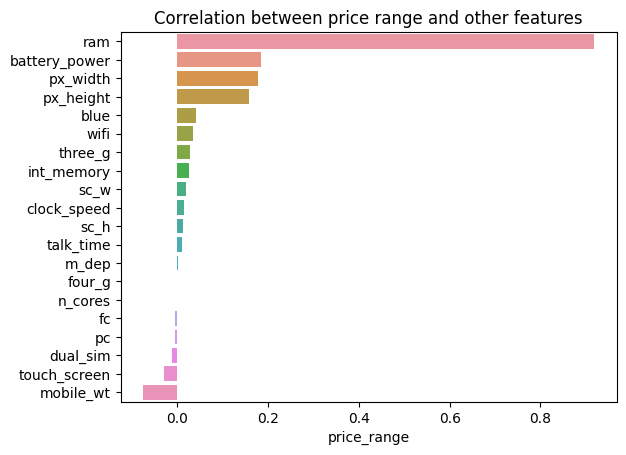

In [115]:
# Correlation graph

temp_df = data_train

corr = temp_df.corr().price_range.sort_values(ascending = False)[1:]
sns.barplot(x = corr, y = corr.index)
plt.title("Correlation between price range and other features")

### Analysis

From the graph above, we can conclude that phone price are largely influenced by the amount of RAM it has.